# SETUP

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# define the name of the csv file you want to read in
accounts = './data/accounts.csv'
#playbacks = './data/playbacks.csv'
#subscriptions = './data/subscriptions.csv'

# ACCOUNTS

In [3]:
# Read accounts (01.10.2020 - 01.10.2022)
df_accounts = pd.read_csv(accounts)
# set column names to lowercase
df_accounts.columns = df_accounts.columns.str.lower()
# show first rows
display(df_accounts.head())

,account_key,postal_code,city,language,country_code,email_hash,onetime_rental_count,subscription_count
0,60a90104f44414d9036aed7d96d1468a5a9e1d104b6791...,5430,Wettingen,de,CH,5f3d193f5be5c279e77a80d7de82ffb34e3883a3d6a3e7...,0,1
1,a48b28809457e680de54b4b560e00117308431c574aab2...,8706,Meilen,de,CH,029a26c1483d78f98002c3be1c902b15ce814b62e45a2a...,0,1
2,7a280859423057ac5f1e0bfc15af602edd23900f3cf7cb...,1005,Lausanne,fr,CH,08a8ff8a3b3fb9be3a8f87a86960bf9f3e43b31d0772e1...,1,0
3,23e7ac18b391549e95a98d85a3adae1f3f90c4fcc09732...,4436,Oberdorf,de,CH,007ada12068218817c2b69325d1bfe2d7ac10da3a9922d...,0,2
4,a39dbaa7972fb67c15db79d4a66cf5d1b94855ae530774...,6005,Luzern,de,CH,cff18967fb0f8b29eeb54a91b98d027920d44c1e771258...,8,2


In [4]:
#check basic information and null values
display(df_accounts.shape)
display(df_accounts.dtypes)
display(df_accounts.describe())
display(df_accounts.isna().sum())

(22154, 8)

account_key             object
postal_code             object
city                    object
language                object
country_code            object
email_hash              object
onetime_rental_count     int64
subscription_count       int64
dtype: object

,onetime_rental_count,subscription_count
count,22154.000000,22154.000000
mean,1.300442,0.550465
std,3.232544,0.830078
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,106.000000,13.000000


account_key               0
postal_code              21
city                     17
language                929
country_code              1
email_hash                0
onetime_rental_count      0
subscription_count        0
dtype: int64

## Postal Code


### Cleaning postal code column

In [5]:
# df_accounts.groupby('postal_code').sum()

In [6]:
# remove non numeric characters
df_accounts['postal_code_clean'] = df_accounts['postal_code'].str.replace('-', '')
df_accounts['postal_code_clean'] = df_accounts['postal_code_clean'].str.extract('(\d+)')
# fill null-values with 0
df_accounts['postal_code_clean'].fillna(0, inplace=True)
df_accounts.groupby(['postal_code_clean', 'postal_code']).sum().head(20)

onetime_rental_count  subscription_count
postal_code_clean postal_code                                           
0                 -                                0                   2
                  ---                              0                   0
                  .                                0                   0
                  Bern                             3                   3
                  Biel                            27                   0
                  Fribourg                         3                   1
                  Fuzhou                           0                   0
                  GENEVE                           0                   0
                  Genève                           0                   4
                  IS                               0                   0
                  Ijjh                             0                   0
                  Pas                              0                   0
                  Rudolfstette                     0                   2
                  Sierre                           1                   0
                  V                                0                   0
                  XXXX                             8                   1
                  Zürich                           0                   0
                  asdf                             0                   1
                  cd                               0                   0
                  gdg                              0                   0

In [7]:
# change data type to integer
df_accounts['postal_code_clean'] = df_accounts['postal_code_clean'].astype(int)
df_accounts.dtypes

account_key             object
postal_code             object
city                    object
language                object
country_code            object
email_hash              object
onetime_rental_count     int64
subscription_count       int64
postal_code_clean        int64
dtype: object

## City

### manual cleaning

In [8]:
'''
# remove numbers
df_accounts['city_clean'] = df_accounts['city'].str.replace('\d+', '')
# fill null values and postal_code 0 with 'na'
df_accounts['city_clean'].fillna('na', inplace=True)
df_accounts.loc[df_accounts["postal_code_clean"] == 0, "city_clean"] = 'na'
# remove and replace special characters
df_accounts['city_clean'] = df_accounts['city_clean'].str.replace('-', ' ')
df_accounts['city_clean'] = df_accounts['city_clean'].str.replace('\.|<', '')
# remove leading and trailing whitespace
df_accounts['city_clean'] = df_accounts['city_clean'].str.strip()
# set city to lowercase for easier comparison
df_accounts['city_clean'] = df_accounts['city_clean'].str.lower()
# zürich cleanup
df_accounts['city_clean'] = df_accounts['city_clean'].str.replace('z..?r.ch.*', 'zürich')
# geneva cleanup
df_accounts['city_clean'] = df_accounts['city_clean'].str.replace('gen.v.*|genf', 'genève')
# biel cleanup
df_accounts['city_clean'] = df_accounts['city_clean'].str.replace('biel..?bienne|bienne.*', 'biel')
'''

'\n# remove numbers\ndf_accounts[\'city_clean\'] = df_accounts[\'city\'].str.replace(\'\\d+\', \'\')\n# fill null values and postal_code 0 with \'na\'\ndf_accounts[\'city_clean\'].fillna(\'na\', inplace=True)\ndf_accounts.loc[df_accounts["postal_code_clean"] == 0, "city_clean"] = \'na\'\n# remove and replace special characters\ndf_accounts[\'city_clean\'] = df_accounts[\'city_clean\'].str.replace(\'-\', \' \')\ndf_accounts[\'city_clean\'] = df_accounts[\'city_clean\'].str.replace(\'\\.|<\', \'\')\n# remove leading and trailing whitespace\ndf_accounts[\'city_clean\'] = df_accounts[\'city_clean\'].str.strip()\n# set city to lowercase for easier comparison\ndf_accounts[\'city_clean\'] = df_accounts[\'city_clean\'].str.lower()\n# zürich cleanup\ndf_accounts[\'city_clean\'] = df_accounts[\'city_clean\'].str.replace(\'z..?r.ch.*\', \'zürich\')\n# geneva cleanup\ndf_accounts[\'city_clean\'] = df_accounts[\'city_clean\'].str.replace(\'gen.v.*|genf\', \'genève\')\n# biel cleanup\ndf_accounts[\'

### mapping plz_files

In [9]:
# set file paths
plz_ch = './data/plz_verzeichnis_ch.csv'
plz_kanton = './data/plz_kantone_ch.csv'
plz_de = './data/plz_verzeichnis_de.csv'
plz_at = './data/plz_verzeichnis_at.csv'
# read csv files
df_plz_ch = pd.read_csv(plz_ch, sep=';')
df_plz_kanton = pd.read_csv(plz_kanton, sep=';')
df_plz_de = pd.read_csv(plz_de, sep=',')
df_plz_at = pd.read_csv(plz_at, sep=';')
# set column names to lowercase
df_plz_ch.columns = df_plz_ch.columns.str.lower()
df_plz_kanton.columns = df_plz_kanton.columns.str.lower()
df_plz_de.columns = df_plz_de.columns.str.lower()
df_plz_at.columns = df_plz_at.columns.str.lower()
# show first rows
'''
display(df_plz_ch.head())
display(df_plz_kanton.head())
display(df_plz_de.head())
display(df_plz_at.head())
'''


'\ndisplay(df_plz_ch.head())\ndisplay(df_plz_kanton.head())\ndisplay(df_plz_de.head())\ndisplay(df_plz_at.head())\n'

In [10]:
# clean plz_kanton
# only keep relevant columns, rename
df_plz_kanton = df_plz_kanton[['postleitzahl / code postal / codice postale', 'ort / ville / città', 'kanton']]
df_plz_kanton.rename(columns = {'postleitzahl / code postal / codice postale':'postal_code', 'ort / ville / città':'city', 'kanton':'state'}, inplace = True)
df_plz_kanton.drop_duplicates(inplace = True)
# add country_code for differentiation
df_plz_kanton['country_code'] = 'CH'

In [11]:
# clean plz_de
# only keep relevant columns, rename, drop duplicates
df_plz_de = df_plz_de[['plz', 'ort', 'bundesland']]
df_plz_de.rename(columns = {'plz':'postal_code', 'ort':'city', 'bundesland':'state'}, inplace = True)
df_plz_de.drop_duplicates(inplace = True)
# add country_code for differentiation
df_plz_de['country_code'] = 'DE'

In [12]:
# clean plz_at
# only keep relevant columns, rename, drop duplicates
df_plz_at = df_plz_at[['plz', 'ort', 'bundesland']]
df_plz_at.rename(columns = {'plz':'postal_code', 'ort':'city', 'bundesland':'state'}, inplace = True)
df_plz_at.drop_duplicates(inplace = True)
# add country_code for differentiation
df_plz_at['country_code'] = 'AT'

In [13]:
#check results 
display(df_plz_kanton.head())
display(df_plz_kanton.shape)
display(df_plz_de.head())
display(df_plz_de.shape)
display(df_plz_at.head())
display(df_plz_at.shape)

,postal_code,city,state,country_code
0,1000,Lausanne,Waadt,CH
1,1003,Lausanne,Waadt,CH
2,1004,Lausanne,Waadt,CH
3,1005,Lausanne,Waadt,CH
4,1006,Lausanne,Waadt,CH


(4120, 4)

,postal_code,city,state,country_code
0,78267,Aach,Baden-Württemberg,DE
1,54298,Aach,Rheinland-Pfalz,DE
2,52062,Aachen,Nordrhein-Westfalen,DE
3,52064,Aachen,Nordrhein-Westfalen,DE
4,52066,Aachen,Nordrhein-Westfalen,DE


(12869, 4)

,postal_code,city,state,country_code
0,1000,Wien,W,AT
1,1004,Wien,W,AT
2,1006,Wien,W,AT
3,1010,Wien,W,AT
4,1011,Wien Postfach,W,AT


(2520, 4)

In [14]:
# unify for merging, check shape
df_plz_all = pd.concat([df_plz_kanton, df_plz_de, df_plz_at])
# dropping plz duplicates with multiple city, keeping the first entry each
df_plz_all = df_plz_all.groupby(['postal_code'])['city', 'state', 'country_code'].first().reset_index()
#check result
display(df_plz_all.head())
display(df_plz_all.shape)

/var/folders/0j/szrk2v_52_bgyh57zj48fk400000gn/T/ipykernel_10580/3284590239.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_plz_all = df_plz_all.groupby(['postal_code'])['city', 'state', 'country_code'].first().reset_index()


,postal_code,city,state,country_code
0,1000,Lausanne,Waadt,CH
1,1003,Lausanne,Waadt,CH
2,1004,Lausanne,Waadt,CH
3,1005,Lausanne,Waadt,CH
4,1006,Lausanne,Waadt,CH


(12548, 4)

In [15]:
# merge city and state information to accounts table on plz and country code
df_accounts_new = pd.merge(df_accounts, df_plz_all, left_on=['postal_code_clean', 'country_code'], right_on=['postal_code', 'country_code'], how='left')

In [16]:
# check results
display(df_accounts_new.head())
# check shape of original and new df
display(df_accounts.shape)
display(df_accounts_new.shape)

,account_key,postal_code_x,city_x,language,country_code,email_hash,onetime_rental_count,subscription_count,postal_code_clean,postal_code_y,city_y,state
0,60a90104f44414d9036aed7d96d1468a5a9e1d104b6791...,5430,Wettingen,de,CH,5f3d193f5be5c279e77a80d7de82ffb34e3883a3d6a3e7...,0,1,5430,5430.0,Wettingen,Aargau
1,a48b28809457e680de54b4b560e00117308431c574aab2...,8706,Meilen,de,CH,029a26c1483d78f98002c3be1c902b15ce814b62e45a2a...,0,1,8706,8706.0,Meilen,Zürich
2,7a280859423057ac5f1e0bfc15af602edd23900f3cf7cb...,1005,Lausanne,fr,CH,08a8ff8a3b3fb9be3a8f87a86960bf9f3e43b31d0772e1...,1,0,1005,1005.0,Lausanne,Waadt
3,23e7ac18b391549e95a98d85a3adae1f3f90c4fcc09732...,4436,Oberdorf,de,CH,007ada12068218817c2b69325d1bfe2d7ac10da3a9922d...,0,2,4436,4436.0,Liedertswil,Basel-Landschaft
4,a39dbaa7972fb67c15db79d4a66cf5d1b94855ae530774...,6005,Luzern,de,CH,cff18967fb0f8b29eeb54a91b98d027920d44c1e771258...,8,2,6005,6005.0,Luzern,Luzern


(22154, 9)

(22154, 12)

In [17]:
# clean plz_a for language information
# only keep relevant columns, rename, drop duplicates
df_plz_ch = df_plz_ch[['postleitzahl', 'sprachcode']]
df_plz_ch.rename(columns = {'postleitzahl':'postal_code'}, inplace = True)
df_plz_ch.drop_duplicates(inplace=True)
# add country_code for differentiation
df_plz_ch['country_code'] = 'CH'
# check result
display(df_plz_ch.head())
display(df_plz_ch.shape)


,postal_code,sprachcode,country_code
0,1000,2,CH
9,1001,2,CH
10,1004,2,CH
11,1009,2,CH
12,1015,2,CH


(3495, 3)

In [18]:
# mapping sprachcode to actual language here or in tableau?
#1 = deutsch,
#2 = französisch,
#3 = italienisch

In [19]:
# merge sprachcode to accounts table
df_accounts_new = pd.merge(df_accounts_new, df_plz_ch, left_on=['postal_code_clean', 'country_code'], right_on=['postal_code', 'country_code'], how='left')

In [20]:
#drop duplicate postal code columns
df_accounts_new = df_accounts_new.drop(['postal_code_x', 'postal_code_y', 'postal_code'], axis=1)
#rename original postal code column
df_accounts_new.rename(columns = {'postal_code_x':'postal_code_original', 'city_x':'city_original', 'city_y':'city_clean'}, inplace = True)

In [21]:
#check results
#display(df_accounts_new.head())
#display(df_accounts_new.shape)

In [22]:
# check result
df_accounts_new.groupby(['state', 'city_original', 'city_clean', 'postal_code_clean', 'sprachcode']).sum().head(10)

onetime_rental_count  \
state  city_original     city_clean   postal_code_clean sprachcode                         
Aargau  5408 Ennetbaden  Ennetbaden   5408              1.0                            0   
        Ennetbaden       Ennetbaden   5408              1.0                            3   
       5000 Aarau        Aarau        5000              1.0                            1   
       5024 Küttigen     Küttigen     5024              1.0                            1   
       5108 Oberflachs   Oberflachs   5108              1.0                            0   
       5225 Bözberg      Oberbözberg  5225              1.0                            0   
       5400 Baden        Baden        5400              1.0                            0   
       5452 Oberrohrdorf Oberrohrdorf 5452              1.0                            0   
       Aarau             Aarau        5000              1.0                           81   
       Aarau             Aarau        5000              1.0                            3   

                                                                    subscription_count  
state  city_original     city_clean   postal_code_clean sprachcode                      
Aargau  5408 Ennetbaden  Ennetbaden   5408              1.0                          0  
        Ennetbaden       Ennetbaden   5408              1.0                          0  
       5000 Aarau        Aarau        5000              1.0                          0  
       5024 Küttigen     Küttigen     5024              1.0                          1  
       5108 Oberflachs   Oberflachs   5108              1.0                          0  
       5225 Bözberg      Oberbözberg  5225              1.0                          1  
       5400 Baden        Baden        5400              1.0                          1  
       5452 Oberrohrdorf Oberrohrdorf 5452              1.0                          0  
       Aarau             Aarau        5000              1.0                         32  
       Aarau             Aarau        5000              1.0                          0

## Country_Code

In [23]:
# show country codes 
#display(df_accounts.country_code.nunique())
#df_accounts.country_code.unique()

In [24]:
#df_accounts.country_code.value_counts().plot(kind='pie');

### Add country name information

In [25]:
# add country information
country= './data/country_code.csv'
df_country = pd.read_csv(country)
df_country.columns = df_country.columns.str.lower()
# check result
display(df_country.shape)
display(df_country.head())

(249, 11)

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [26]:
#only keep relevant columns, rename
df_country = df_country[['name', 'alpha-2', 'region', 'sub-region']]
df_country.rename(columns = {'alpha-2':'country_code', 'name':'country_name', 'sub-region':'sub_region'}, inplace = True)
df_country.head()

,country_name,country_code,region,sub_region
0,Afghanistan,AF,Asia,Southern Asia
1,Åland Islands,AX,Europe,Northern Europe
2,Albania,AL,Europe,Southern Europe
3,Algeria,DZ,Africa,Northern Africa
4,American Samoa,AS,Oceania,Polynesia


In [27]:
#merge to accounts_new table
df_accounts = pd.merge(df_accounts_new, df_country, on='country_code', how='left')
#df_accounts_new.head()

In [28]:
#check result
#df_accounts_new.groupby(['region', 'sub_region', 'country_code', 'country_name']).sum()

## Language

In [30]:
# check for null values
df_accounts.language.isna().sum()

936

In [31]:
#fill null values
df_accounts['language'].fillna('na', inplace=True)

## CSV Export

In [36]:
# export to csv for tableau eda
#df_accounts_new.to_csv('./data/accounts_new.csv')

## Preliminary Analysis

### general information

In [69]:
df_accounts.shape

(22308, 14)

In [35]:
# check for null values
df_accounts.isnull().sum()
# high amount of null values for city/state/sprachcode --> added information only for D/A/CH region

account_key                0
city_original             17
language                   0
country_code               1
email_hash                 0
onetime_rental_count       0
subscription_count         0
postal_code_clean          0
city_clean              1857
state                   1857
sprachcode              4046
country_name               2
region                     2
sub_region                 2
dtype: int64

In [88]:
df_accounts.describe()

,onetime_rental_count,subscription_count,postal_code_clean,sprachcode
count,22308.000000,22308.000000,2.230800e+04,18262.000000
mean,1.299354,0.551103,1.092025e+05,1.309659
std,3.227044,0.830525,6.162549e+06,0.481398
min,0.000000,0.000000,0.000000e+00,1.000000
25%,0.000000,0.000000,1.985000e+03,1.000000
50%,0.000000,0.000000,5.200000e+03,1.000000
75%,1.000000,1.000000,8.134000e+03,2.000000
max,106.000000,13.000000,7.875131e+08,3.000000


### geographical information

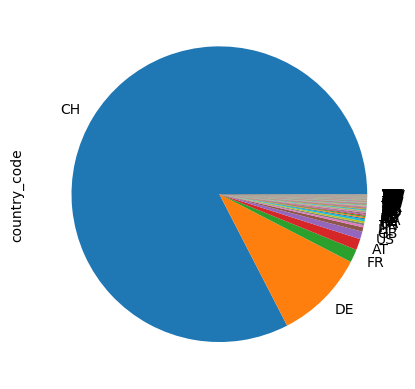

In [89]:
df_accounts.country_code.value_counts().plot(kind='pie');

In [90]:
df_accounts['country_code'].value_counts(normalize=True)


CH    0.825795
DE    0.098489
FR    0.014300
AT    0.012283
US    0.008293
        ...   
GU    0.000045
TW    0.000045
SI    0.000045
JP    0.000045
CM    0.000045
Name: country_code, Length: 124, dtype: float64

In [94]:
df_CH = df_accounts[(df_accounts['country_code']=='CH')]
df_CH.state.value_counts(normalize=True)

Zürich                      0.286475
Bern                        0.171193
Genf                        0.127407
Waadt                       0.101235
Aargau                      0.049657
Basel-Stadt                 0.042359
Luzern                      0.030398
Freiburg                    0.029739
St. Gallen                  0.025789
Wallis                      0.019863
Neuenburg                   0.019314
Graubünden                  0.018326
Basel-Landschaft            0.014815
Solothurn                   0.014595
Thurgau                     0.011029
Tessin                      0.007846
Zug                         0.006584
Schaffhausen                0.004883
Appenzell Ausserrhoden      0.004280
Schwyz                      0.003676
Jura                        0.003457
Nidwalden                   0.001811
Glarus                      0.001756
Obwalden                    0.001756
Uri                         0.001097
Appenzell Innerrhoden       0.000604
Fürstentum Liechtenstein    0.000055
N

### language

In [95]:
display(df_accounts.language.nunique())
display(df_accounts.language.unique())
display(df_accounts.language.value_counts(normalize=True))

6

array(['de', 'fr', 'en', 'na', 'pt', 'nl'], dtype=object)

de    0.600861
fr    0.239152
en    0.117940
na    0.041958
pt    0.000045
nl    0.000045
Name: language, dtype: float64

In [32]:
df_accounts.groupby('language').sum()

,onetime_rental_count,subscription_count,postal_code_clean,sprachcode
language,,,,
de,19532,7661,262146626,11718.0
en,2388,1126,1941475719,1999.0
fr,7014,3462,152887986,9420.0
na,52,44,76726916,780.0
nl,0,1,2394,0.0
pt,0,0,2850090,0.0


### subscriptions and OTRs

In [68]:
#general information on counts
display(df_accounts.onetime_rental_count.describe())
# OTR 106 -> outlier?
display(df_accounts.subscription_count.describe())

count    22308.000000
mean         1.299354
std          3.227044
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        106.000000
Name: onetime_rental_count, dtype: float64

count    22308.000000
mean         0.551103
std          0.830525
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         13.000000
Name: subscription_count, dtype: float64

array([[<AxesSubplot:title={'center':'subscription_count'}>]],
      dtype=object)

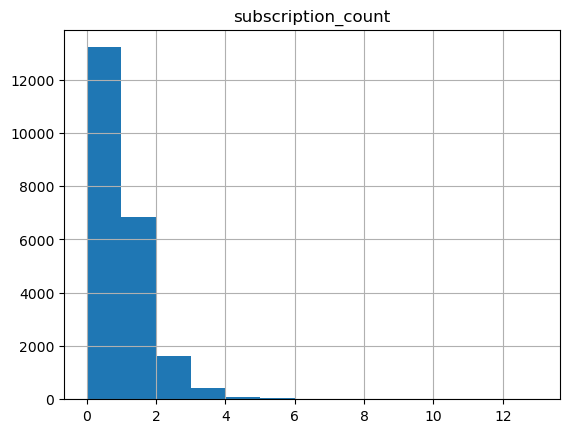

In [79]:
df_accounts.hist(column='subscription_count', bins = 13)

array([[<AxesSubplot:title={'center':'onetime_rental_count'}>]],
      dtype=object)

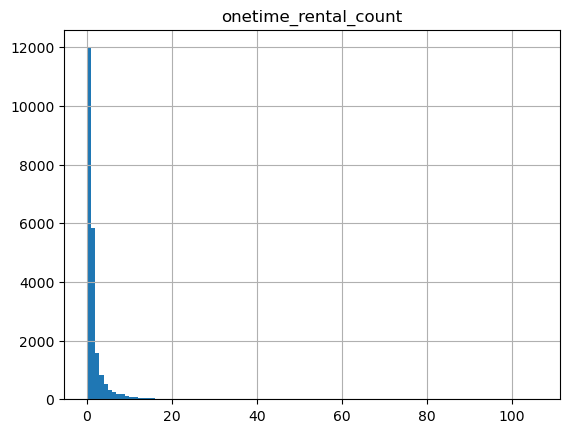

In [86]:
df_accounts.hist(column='onetime_rental_count', bins = 106)

<AxesSubplot:>

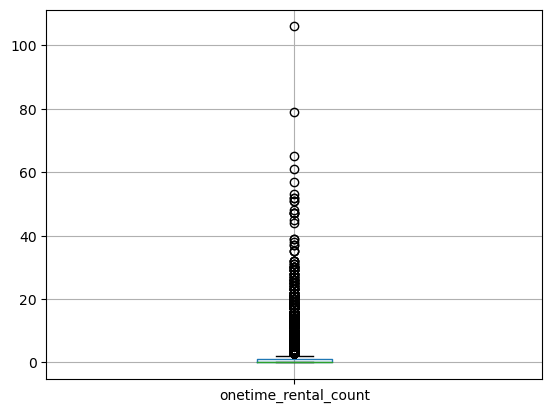

In [87]:
df_accounts.boxplot(column='onetime_rental_count')

In [62]:
#Check for accounts with subscription
#display(df_accounts.subscription_count.unique())
# display(df_accounts['subscription_count'].apply(lambda x: True if x == 0 else False).value_counts())
display(len(df_accounts[(df_accounts['subscription_count']>0)]))
# 9090 accounts with subscription
display(len(df_accounts[(df_accounts['subscription_count']>0)])
    /len(df_accounts))
# only 40% of accounts have a subscription

9090

0.407477138246369

In [63]:
#Check for accounts with one time rentals
display(len(df_accounts[(df_accounts['onetime_rental_count']>0)]))
# 10308 accounts with OTR
display(len(df_accounts[(df_accounts['onetime_rental_count']>0)])
    /len(df_accounts))
# 46% of accounts have OTR

10308

0.46207638515330823

In [67]:
#Check for accounts with OTR and subscription (heavy users)
display(len(df_accounts[(df_accounts['subscription_count']>0) & (df_accounts['onetime_rental_count']>0)]))
# 2159 accounts with OTR and subscription
display(len(df_accounts[(df_accounts['subscription_count']>0) & (df_accounts['onetime_rental_count']>0)])
    /len(df_accounts))
# 10% of accounts with subscription and OTR

2159

0.09678142370450063

In [66]:
#Check for accounts with no subscriptions and no OTRs (sleeping dogs)
display(len(df_accounts[(df_accounts['subscription_count']==0) & (df_accounts['onetime_rental_count']==0)]))
# 5060 accounts with no subs and no OTRs
display(len(df_accounts[(df_accounts['subscription_count']==0) & (df_accounts['onetime_rental_count']==0)])
    /len(df_accounts))
# 22% of accounts with no subscription and no OTR

5069

0.22722790030482337

In [59]:
#Check for accounts with no OTR and no subscription
display(len(df_accounts[(df_accounts['subscription_count']==0) & (df_accounts['onetime_rental_count']==0)]))
# 5060 accounts with neither OTR nor subscription
display(len(df_accounts[(df_accounts['subscription_count']==0) & (df_accounts['onetime_rental_count']==0)])
    /len(df_accounts))
# 22% of accounts with no subscription and no OTR


5069

0.22722790030482337

In [60]:
df_non_user = (df_accounts[(df_accounts['subscription_count']==0) & (df_accounts['onetime_rental_count']==0)])
df_non_user.head()

,account_key,city_original,language,country_code,email_hash,onetime_rental_count,subscription_count,postal_code_clean,city_clean,state,sprachcode,country_name,region,sub_region
122,a83a5ebcf2808460c3487ed466711e339c258ea353cf61...,Zürich,de,CH,da013567997f8c9f73516e8504929eedae3e9e0daa4bf3...,0,0,8003,Zürich,Zürich,1.0,Switzerland,Europe,Western Europe
180,37402f853be34f688e6b12b6d4d44620050d9d04f72d25...,Köln,na,DE,97df5351585f46168c8077c7813dd2fd7416e3c0f13623...,0,0,50858,Köln,Nordrhein-Westfalen,NaN,Germany,Europe,Western Europe
539,bc9c49b34befcf43f86a92a3daaa3282fee584a2c1d263...,Ennetbaden,fr,CH,88ff5216a611e3f4be6ca36f0e79c8498a27ff63701f17...,0,0,5408,Ennetbaden,Aargau,1.0,Switzerland,Europe,Western Europe
573,a6f3604b6c7c54e3145b94cf9a4992f9f50e14eb92c343...,Les Bois,na,CH,3edfba31f1a9c96c65abc01f3b8c967650f7b615a2684c...,0,0,2336,Les Bois,Jura,2.0,Switzerland,Europe,Western Europe
574,85d4197f25bd5e44ebbb4fc9c22fe199934242de013382...,test,de,CH,d42ba23d38c1bccb58549860cdb5bae25576a8f31c0545...,0,0,8788,NaN,NaN,NaN,Switzerland,Europe,Western Europe


In [84]:
#general information on counts (only for active users)
display(df_accounts[(df_accounts['subscription_count']>0)].subscription_count.describe())
display(df_accounts[(df_accounts['onetime_rental_count']>0)].onetime_rental_count.describe())


count    9090.000000
mean        1.352475
std         0.780347
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        13.000000
Name: subscription_count, dtype: float64

count    10308.000000
mean         2.811991
std          4.276007
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        106.000000
Name: onetime_rental_count, dtype: float64